# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**<span style="color:red">Warm suggestion: by using the 1D representation</span>** (but you can work with the representation you prefer or the one you are able to invent) ...

### Exercise 09.1

Write a C++ code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population, e.g. select the individual $j$ with the algorithm: $j=N\times int(r^p)$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bods and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">32 cities randomly placed **on** a circumference</span>
- <span style="color:blue">32 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path</span>

#### Algoritmo genetico

Utilizzo un algoritmo genetico per ottimizzare il percorso del problema del commesso viaggiatore. Codifico il percorso da seguire attraverso un vettore della forma: $[X_1, X_2, ..., X_N]$, dove le $X_i$ indicano gli indici della città da visitare, con $X_i = 1, ..., N$.

Per realizzare l'algoritmo implemento qualche operatore di mutazione, uno di selezione e uno di crossover. Tutte le operazioni sui percorsi tengono il primo elemento del percorso fissato a 1: $[1, X_{2}, ..., X_{N}]$. In questo modo si elimina la degenerazione che consegue dal percorrere lo stesso percorso partendo da città diverse.

Per controllare che il percorso rispetti le condizioni del problema utilizzo una funzione **check** che controlli le seguenti cose:

- ogni elemento del percorso sia compreso tra 1 e N;
- i numeri tra 1 e N compaiano tutti una volta sola (nessuna ripetizione);
- se le condizioni precedenti sono soddisfatte, che la posizione 1 sia il primo elemento del vettore.

Implemento i seguenti operatori di **mutazione**:

1. Permutazione di due elementi $X_i$ e $X_j$ del percorso: $[1, ..., X_i, ..., X_j, ..., X_N] \to [1, ..., X_j, ..., X_i, ..., X_N]$ 


2. Traslazione di $+n$ posizioni di tutti gli elementi del blocco compreso tra gli indici i e j: $[1, ..., X_i, ..., X_j, X_{j+1}, ..., X_{j+n}, ..., X_N] \to [1, ...,X_{j+1}, ..., X_{j+n}, X_i, ..., X_j, ..., X_N]$ 


3. Permutazione di un blocco di $m$ elementi con un altro blocco dello stesso numero di elementi: $[1, ..., X_i, ..., X_{i+m},..., X_{j}, ..., X_{j+m}, ..., X_N] \to [1, ..., X_j, ..., X_{j+m},..., X_{i}, ..., X_{i+m}, ..., X_N]$ 


4. Inversione dell'ordine degli elementi compresi tra due indici: $[1, ..., X_i, X_{i+1},..., X_{j-1}, X_j, ..., X_N] \to [1, ..., X_j, X_{j-1},..., X_{i+1}, X_i, ..., X_N]$ 


Infine raggruppo questi metodi in un operatore che chiama ciascuno di essi con una data proababilità $p_m$. Utilizzando solo queste mutazioni provo ad eseguire una ricerca casuale: anche con probabilità di mutazione molto alte non si riesce a trovare una buona soluzione per il percorso.

Implemento l'operatore di **selezione** nel seguente modo: ordino gli individui in funzione della loro fitness $f_i$ (utilizzo la norma $L^{(1)}$) e per ciascuno di essi considero lo scarto dalla fitness del miglior individuo $\Delta f_i = f_i - f_0$. Per ciascun individuo definisco una probabilità di essere selzionato nel seguente modo:

$$ p_i = \frac{1}{(\Delta f_i + 1)^2}$$

Gli individui molto meno adatti rispetto al migliore danno un $\Delta f_i$ grande e hanno quindi minore probabilità di essere selezionati. L'operatore estrae un numero casuale secondo le probabilità così definite.

Infine definisco un operatore di **crossover** per generare due percorsi figli: prendo due individui dalla popolazione e in ciascun genitore riordino gli elementi successivi a un certo indice secondo l'ordine in cui compaiono nell'altro genitore. Questo operatore viene chiamato con una certa probabilità $p_c$, in caso non avvenga il crossover i due individui figli sono copie dei genitori.

A questo punto implemento l'**algortimo genetico** in questi step:

1. ordino gli individui della popolazione a seconda della loro fitness,
2. utilizzo l'operatore di selezione per estrarre due individui diversi,
3. utilizzo l'operatore di crossover sui genitori estratti con probabilità $p_c$,
4. utilizzo l'operatore di mutazione sui figli con probabilità $p_m$,
5. sostituisco la nuova popolazione alla vecchia.

#### Problema del commesso viaggiatore

Utilizzo l'algoritmo genetico per risolvere il problema del commesso viaggiatore. Genero casualmente 32 città distribuite su una circonferenza di raggio 1 e su un quadrato di lato 2. Costruisco una popolazione di $100$ percorsi che danno l'ordine delle città e utilizzo una probabilità di mutazione e di crossover rispettivamente del $5 \%$ e del $75 \%$. Scelgo il numero di genreazioni nel seguente modo: $N_{\mathrm{gen}} = 1000$ per ottimizzare i punti distribuiti su una circonferenza, $N_{\mathrm{gen}} = 500$ per quelli sul quadrato.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ordina(x, path): #ordina il vettore x secondo il vettore path
    
    size=len(x)
    x_ord=np.zeros(size)

    for i,j in enumerate(path):
        order=int(j-1)
        x_ord[i]=x[order]
    
    return x_ord

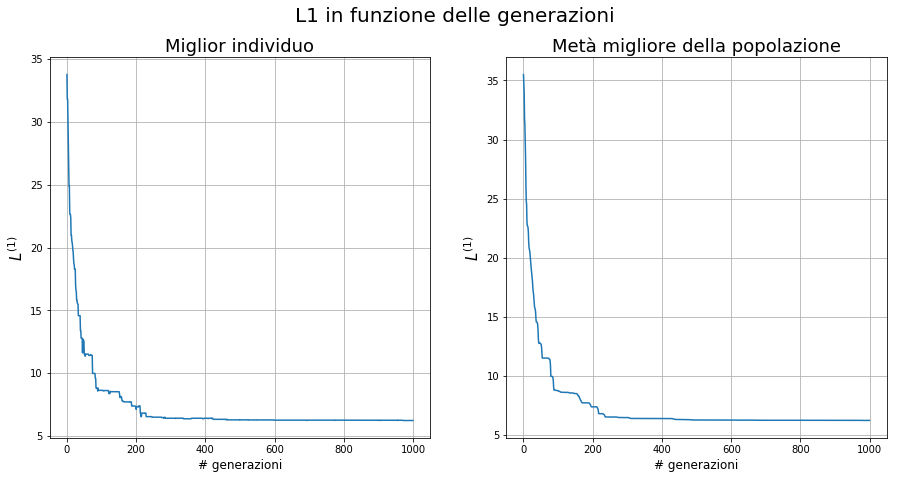

In [3]:
L_best_c = np.loadtxt("Es09.1/best_circle.dat", usecols=(0), delimiter=' ', unpack=True)
L_ave_c = np.loadtxt("Es09.1/ave_circle.dat", usecols=(0), delimiter=' ', unpack=True)


fig = plt.figure(figsize = (15,7))
plt.suptitle('L1 in funzione delle generazioni', size=20)

plt.subplot(1, 2, 1) 

plt.plot(L_best_c)
plt.xlabel('# generazioni', size=12)
plt.ylabel('$L^{(1)}$', size=15)
plt.title('Miglior individuo', size=18)
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(L_ave_c)
plt.xlabel('# generazioni', size=12)
plt.ylabel('$L^{(1)}$', size=15)
plt.title('Metà migliore della popolazione', size=18)
plt.grid(True)

plt.show();

Al crescere delle generazioni la norma $L^{(1)}$ decresce sia per il miglior individuo che nel caso della media sulla metà migliore della popolazione, fino a stabilizzarsi dopo circa $400$ generazioni. Le due curve presentano circa lo stesso andamento, il miglior individuo ha delle piccole oscillazioni che non influiscono significativamente sul valore medio.

In [4]:
x_c, y_c = np.loadtxt("Es09.1/cities_circle.dat", usecols=(0,1), delimiter=' ', unpack=True)
path_c = np.loadtxt("Es09.1/optimal_path_circle.dat", usecols=(0), delimiter=' ', unpack=True)

############ ordino i punti secondo il percorso migliore #########################

x_ord_c=ordina(x_c, path_c)
y_ord_c=ordina(y_c, path_c)

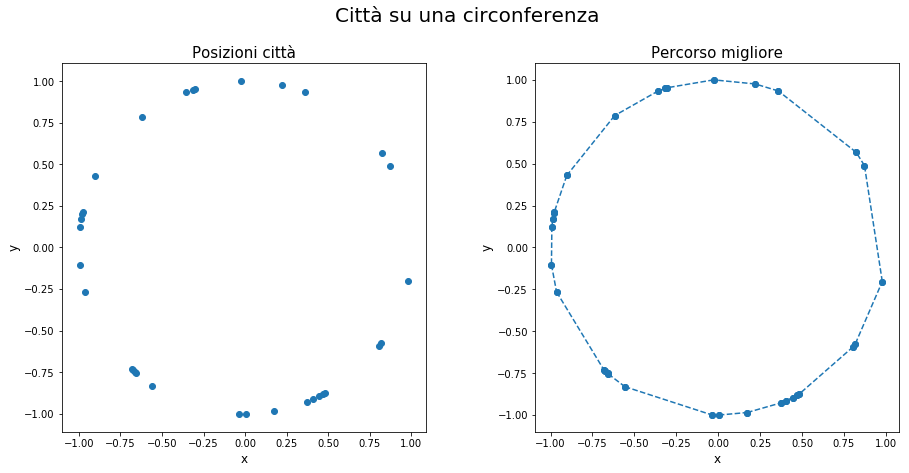

In [5]:
fig = plt.figure(figsize = (15,7))
plt.suptitle('Città su una circonferenza', size=20)

plt.subplot(1, 2, 1)    

plt.scatter(x_c,y_c)
plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.title('Posizioni città', size=15)
plt.gca().set_aspect('equal', adjustable='box')



plt.subplot(1, 2, 2)

size_c=len(x_ord_c)
for i in range(0, size_c-1):
    
    plt.plot([x_ord_c[i],x_ord_c[i+1]], [y_ord_c[i],y_ord_c[i+1]], 'o--', color='tab:blue')
    
plt.plot([x_ord_c[0], x_ord_c[size_c-1]], [y_ord_c[0], y_ord_c[size_c-1]], 'o--')

plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.title('Percorso migliore', size=15)
plt.gca().set_aspect('equal', adjustable='box')


plt.subplots_adjust(wspace=0.3, hspace=0.3)

Il percorso trovato corrisponde effettivamente con quello ottimale. Si ha una lunghezza di $L^{(1)} = 6.22997 < 2\pi$.

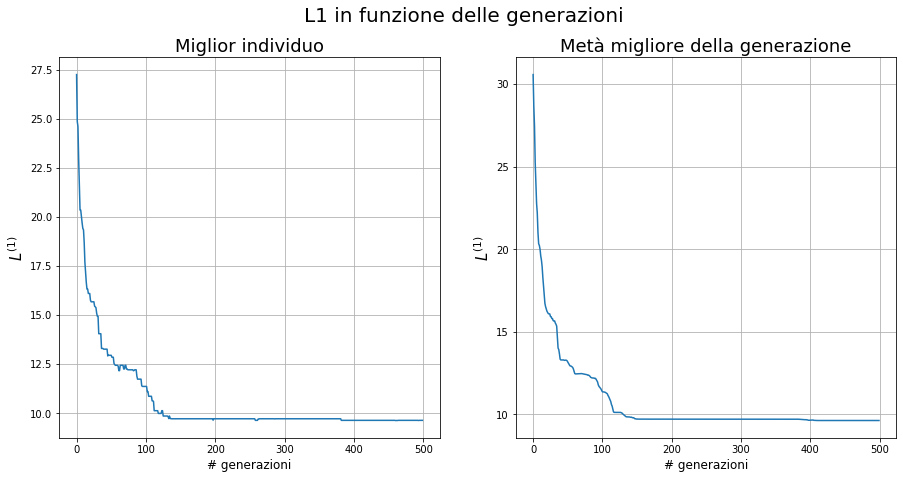

In [6]:
L_best_s = np.loadtxt("Es09.1/best_square.dat", usecols=(0), delimiter=' ', unpack=True)
L_ave_s = np.loadtxt("Es09.1/ave_square.dat", usecols=(0), delimiter=' ', unpack=True)


fig = plt.figure(figsize = (15,7))
plt.suptitle('L1 in funzione delle generazioni', size=20)

plt.subplot(1, 2, 1) 

plt.plot(L_best_s)
plt.xlabel('# generazioni', size=12)
plt.ylabel('$L^{(1)}$', size=15)
plt.title('Miglior individuo', size=18)
plt.grid(True)


plt.subplot(1, 2, 2) 
plt.plot(L_ave_s)
plt.xlabel('# generazioni', size=12)
plt.ylabel('$L^{(1)}$', size=15)
plt.title('Metà migliore della generazione', size=18)
plt.grid(True)

plt.show();

Al crescere delle generazioni la norma $L^{(1)}$ decresce sia per il miglior individuo che nel caso della media sulla metà migliore della popolazione, fino a stabilizzarsi dopo circa $150$ generazioni. Dopo circa $400$ iterazioni si ha un'ulteriore decrescita del valore della fitness. Le due curve presentano circa lo stesso andamento, il miglior individuo ha delle piccole oscillazioni che non influiscono significativamente sul valore medio.

In [7]:
x_s, y_s = np.loadtxt("Es09.1/cities_square.dat", usecols=(0,1), delimiter=' ', unpack=True)
path_s = np.loadtxt("Es09.1/optimal_path_square.dat", usecols=(0), delimiter=' ', unpack=True)

############ ordino i punti secondo il percorso migliore #########################

x_ord_s=ordina(x_s, path_s)
y_ord_s=ordina(y_s, path_s)

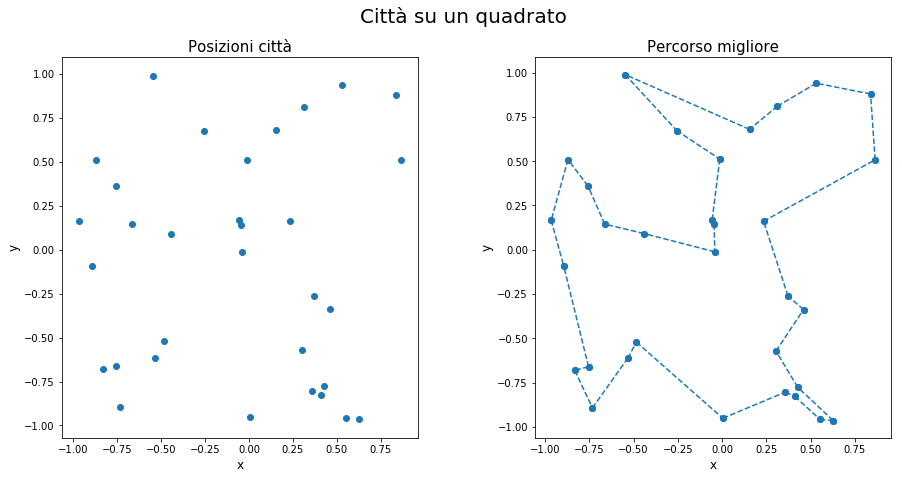

In [8]:
fig = plt.figure(figsize = (15,7))
plt.suptitle('Città su un quadrato', size=20)

plt.subplot(1, 2, 1)    

plt.scatter(x_s,y_s, label='città')
plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.title('Posizioni città', size=15)
plt.gca().set_aspect('equal', adjustable='box')



plt.subplot(1, 2, 2)

size_s=len(x_ord_s)
for i in range(0, size_s-1):
    
    plt.plot([x_ord_s[i],x_ord_s[i+1]], [y_ord_s[i],y_ord_s[i+1]], 'o--', color='tab:blue', zorder=1)
    
plt.plot([x_ord_s[0], x_ord_s[size_s-1]], [y_ord_s[0], y_ord_s[size_s-1]], 'o--', color='tab:blue',  zorder=1)

plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.title('Percorso migliore', size=15)

plt.gca().set_aspect('equal', adjustable='box')


plt.subplots_adjust(wspace=0.3, hspace=0.3)

Il percorso trovato dall'algoritmo ha lunghezza $L^{(1)} = 9.62746$.